# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

model = RandomForestClassifier(n_estimators=100, random_state=42)
df = pd.read_csv('..\\data\\data.csv')

df = df[df['concentration'] > 0]


# Definisco le variabili feature
features = ['wind_direction', 'concentration', 'Wind Speed', 'azimuth_degrees']
X = df[features]
# Definisco la variabile target
y = df['distance']



In [ ]:
X

,wind_direction,concentration,Wind Speed,azimuth_degrees
8,NaN,0.00920,1,49.0
11,0.42,0.01380,1,52.0
14,NaN,0.00460,1,55.0
17,NaN,0.00920,1,58.0
20,NaN,0.01380,1,61.0
...,...,...,...,...
4384,NaN,0.46060,10,127.5
4386,0.42,0.18800,10,129.0
4387,0.42,0.01692,10,129.0
4389,NaN,0.11233,10,130.5


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
trained_model = model.fit(X_train, y_train)
# Predizioni sul test set
y_test_pred = trained_model.predict(X_test)
# Valuto le prestazioni del modello
accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", accuracy)
print("Classification report:\n", classification_report(y_test, y_test_pred))

Test set accuracy: 0.6959349593495935
Classification report:
               precision    recall  f1-score   support

          50       0.76      0.78      0.77       249
         100       0.59      0.60      0.60       199
         200       0.73      0.69      0.71       167

    accuracy                           0.70       615
   macro avg       0.69      0.69      0.69       615
weighted avg       0.70      0.70      0.70       615



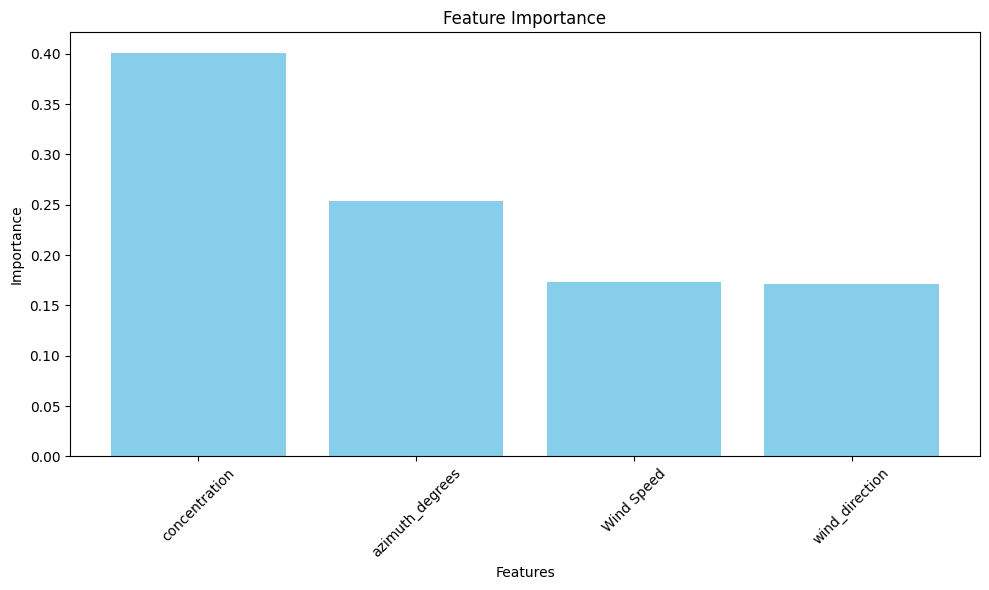

In [ ]:
# Alleno il modello
model.fit(X, y)

# Feature importance
importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Plotto le feature importance
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Classification Report:")
print("Accuracy: ", accuracy_score(y, y_pred))
print("Precision: ", precision_score(y, y_pred, average='weighted'))
print("Recall: ", recall_score(y, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y, y_pred, average='weighted')) 

Classification Report:
Accuracy:  0.5315192743764172
Precision:  0.530883717303528
Recall:  0.5315192743764172
F1 Score:  0.5311938097942749


In [21]:
# Predizione su nuovi dati
def predict_distance( wind_direction, concentration, Wind_Speed, azimuth_degrees):
    new_sample = pd.DataFrame([[ wind_direction, concentration, Wind_Speed, azimuth_degrees]], columns=features)
    prediction = model.predict(new_sample)[0]
    probabilities = model.predict_proba(new_sample)[0]
    print(f"Predicted distance: {prediction} metri")
    print(f"Probabilities per classe:")
    for i, prob in enumerate(probabilities):
        print(f"Classe {i} m: {prob:.2f}")
    return prediction

In [ ]:
# Esempio di predizione
predict_distance( wind_direction=45, concentration=5, Wind_Speed=10, azimuth_degrees=60)


Predicted distance: 200 metri
Probabilities per classe:
Classe 0 m: 0.04
Classe 1 m: 0.26
Classe 2 m: 0.70


np.int64(200)